<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-analysis:-Impact-of-Covid-19-pandemic-on-the-air-quality" data-toc-modified-id="Final-analysis:-Impact-of-Covid-19-pandemic-on-the-air-quality-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final analysis: Impact of Covid-19 pandemic on the air quality</a></span><ul class="toc-item"><li><span><a href="#Import-the-air-quality-and-covid-data-files" data-toc-modified-id="Import-the-air-quality-and-covid-data-files-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import the air quality and covid data files</a></span></li><li><span><a href="#How-has-change-in-Covid-19-active-cases-correlated-with-change-in-Australia's-air-quality-in-2020H1?" data-toc-modified-id="How-has-change-in-Covid-19-active-cases-correlated-with-change-in-Australia's-air-quality-in-2020H1?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How has change in Covid-19 active cases correlated with change in Australia's air quality in 2020H1?</a></span></li><li><span><a href="#How-has-change-in-Covid-19-active-cases-correlated-with-change-in-India's-air-quality-in-2020H1?" data-toc-modified-id="How-has-change-in-Covid-19-active-cases-correlated-with-change-in-India's-air-quality-in-2020H1?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How has change in Covid-19 active cases correlated with change in India's air quality in 2020H1?</a></span></li><li><span><a href="#How-has-change-in-Covid-19-active-cases-correlated-with-change-in-the-world's-air-quality-in-2020H1?" data-toc-modified-id="How-has-change-in-Covid-19-active-cases-correlated-with-change-in-the-world's-air-quality-in-2020H1?-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>How has change in Covid-19 active cases correlated with change in the world's air quality in 2020H1?</a></span></li></ul></li></ul></div>

# Final analysis: Impact of Covid-19 pandemic on the air quality

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy.stats import linregress

## Import the air quality and covid data files 

In [2]:
world_air = pd.read_csv("output_csv/clean_world_air.csv", parse_dates=True)
world_air.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
0,2020-02-24,IR,Isfahan,pm25,129,54.0,194.0,126.0,10921.40,"Iran, Islamic Republic of"
1,2020-05-07,IR,Isfahan,pm25,168,17.0,168.0,91.0,14014.00,"Iran, Islamic Republic of"
2,2020-05-28,IR,Isfahan,pm25,127,17.0,115.0,72.0,3558.56,"Iran, Islamic Republic of"
3,2020-02-20,IR,Isfahan,pm25,113,26.0,181.0,76.0,11209.80,"Iran, Islamic Republic of"
4,2020-02-23,IR,Isfahan,pm25,132,22.0,132.0,76.0,3209.67,"Iran, Islamic Republic of"


In [3]:
world_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464925 entries, 0 to 1464924
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Date          1464925 non-null  object 
 1   Country_code  1464925 non-null  object 
 2   City          1464925 non-null  object 
 3   Specie        1464925 non-null  object 
 4   count         1464925 non-null  int64  
 5   min           1464925 non-null  float64
 6   max           1464925 non-null  float64
 7   median        1464925 non-null  float64
 8   variance      1464925 non-null  float64
 9   Country_name  1464925 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 111.8+ MB


In [4]:
world_air['Date'] = world_air['Date'].astype('datetime64[ns]')

In [5]:
world_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464925 entries, 0 to 1464924
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   Date          1464925 non-null  datetime64[ns]
 1   Country_code  1464925 non-null  object        
 2   City          1464925 non-null  object        
 3   Specie        1464925 non-null  object        
 4   count         1464925 non-null  int64         
 5   min           1464925 non-null  float64       
 6   max           1464925 non-null  float64       
 7   median        1464925 non-null  float64       
 8   variance      1464925 non-null  float64       
 9   Country_name  1464925 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 111.8+ MB


In [6]:
active_world_covid = pd.read_csv("output_csv/active_world_covid.csv", parse_dates=True)
active_world_covid.head()

,Date,Total active cases
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1350
4,2020-01-26,2005


In [7]:
active_world_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                162 non-null    object
 1   Total active cases  162 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


In [8]:
active_world_covid['Date'] = active_world_covid['Date'].astype('datetime64[ns]')

In [9]:
active_world_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                162 non-null    datetime64[ns]
 1   Total active cases  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.7 KB


In [10]:
active_au_covid = pd.read_csv("output_csv/active_au_covid.csv", parse_dates=True)
active_au_covid.head()

,Date,Country,Active cases
0,2020-01-22,Australia,0
1,2020-01-23,Australia,0
2,2020-01-24,Australia,0
3,2020-01-25,Australia,0
4,2020-01-26,Australia,4


In [11]:
active_au_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          162 non-null    object
 1   Country       162 non-null    object
 2   Active cases  162 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [12]:
active_au_covid['Date'] = active_au_covid['Date'].astype('datetime64[ns]')

In [13]:
active_au_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          162 non-null    datetime64[ns]
 1   Country       162 non-null    object        
 2   Active cases  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ KB


In [14]:
active_india_covid = pd.read_csv("output_csv/active_india_covid.csv", parse_dates=True)
active_india_covid.head()

,Date,Country,Active cases
0,2020-01-22,India,0
1,2020-01-23,India,0
2,2020-01-24,India,0
3,2020-01-25,India,0
4,2020-01-26,India,0


In [15]:
active_india_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          162 non-null    object
 1   Country       162 non-null    object
 2   Active cases  162 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ KB


In [16]:
active_india_covid['Date'] = active_india_covid['Date'].astype('datetime64[ns]')

In [17]:
active_india_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          162 non-null    datetime64[ns]
 1   Country       162 non-null    object        
 2   Active cases  162 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ KB


In [18]:
def world_air_covid_each_specie(airdf, specie, covid_df):
    air_median_specie_transposed = airdf[airdf["Specie"] == specie].pivot_table(
        index="Date", columns="Country_code", values="median", aggfunc=np.median)

    air_median_specie_transposed[f"Median {specie}"] = air_median_specie_transposed.median(
        axis=1)

    final_air_median_specie_transposed = air_median_specie_transposed.iloc[:, -1].to_frame(
    ).reset_index()

    air_covid_median_specie = pd.merge(
        covid_df, final_air_median_specie_transposed, how="inner", on="Date")
    return air_covid_median_specie

> In the above function, the **air_median_specie_transposed** uses **aggfunc=np.median** to get the median value of the distribution of each specie's median values measured in all cities under each country in the dataset. The **Median {specie}** column takes the median values of the distribution of each specie in all countries on the same date. The median aggregate functions are used to minimise the impact of outliers in the air quality dataset.

In [19]:
def linear_regression_plot(df, x, y, df_name, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    regress_values = slope * df[x] + intercept

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(df[x], df[y], facecolors="dodgerblue", alpha=0.5)
    plt.plot(df[x], regress_values, "b--", linewidth=1)
    plt.annotate(line_eq, (df[x].quantile(0.75), df[y].quantile(0.75)), fontsize=15, color="blue")
    
    plt.xlabel(f"Number of {x}")
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(f"images/{df_name}_linear.png")
    plt.show()

## How has change in Covid-19 active cases correlated with change in Australia's air quality in 2020H1?

In [20]:
au_air_df = world_air[world_air["Country_code"]=="AU"].copy()
au_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
490904,2020-02-04,AU,Sydney,co,56,1.2,4.5,3.4,10.12,Australia
490905,2020-03-29,AU,Sydney,co,9,1.2,3.4,2.3,9.07,Australia
490906,2020-06-26,AU,Sydney,co,45,1.2,6.7,2.3,17.91,Australia
490907,2020-05-22,AU,Sydney,co,14,1.2,2.3,1.2,2.19,Australia
490908,2020-06-04,AU,Sydney,co,33,1.2,5.6,2.3,16.16,Australia


In [21]:
au_air_covid_co = world_air_covid_each_specie(airdf=au_air_df, specie="co", covid_df=active_au_covid)
au_air_covid_co.head()

,Date,Country,Active cases,Median co
0,2020-01-22,Australia,0,2.15
1,2020-01-23,Australia,0,2.15
2,2020-01-24,Australia,0,3.15
3,2020-01-25,Australia,0,2.10
4,2020-01-26,Australia,4,2.30


The correlation coefficient is: -0.27682230150022347
The r-squared is: 0.07663058660788062


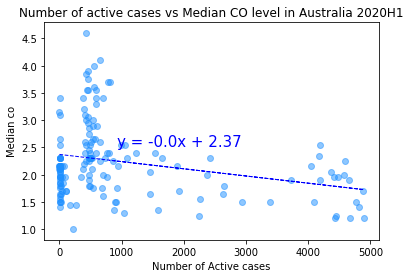

In [22]:
linear_regression_plot(au_air_covid_co, "Active cases", "Median co", "au_air_covid_co",
                       "Number of active cases vs Median CO level in Australia 2020H1")

In [23]:
au_air_covid_pm25 = world_air_covid_each_specie(airdf=au_air_df, specie="pm25", covid_df=active_au_covid)
au_air_covid_pm25.head()

,Date,Country,Active cases,Median pm25
0,2020-01-22,Australia,0,25.0
1,2020-01-23,Australia,0,24.0
2,2020-01-24,Australia,0,25.0
3,2020-01-25,Australia,0,20.5
4,2020-01-26,Australia,4,19.5


The correlation coefficient is: -0.12186207920586578
The r-squared is: 0.014850366348376704


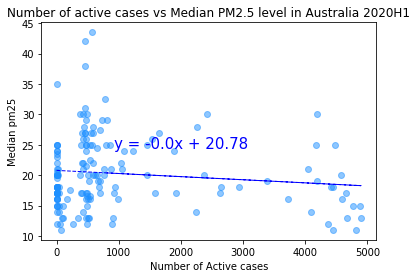

In [24]:
linear_regression_plot(au_air_covid_pm25, "Active cases", "Median pm25", "au_air_covid_pm25",
                       "Number of active cases vs Median PM2.5 level in Australia 2020H1")

In [25]:
au_air_covid_pm10 = world_air_covid_each_specie(airdf=au_air_df, specie="pm10", covid_df=active_au_covid)
au_air_covid_pm10.head()

,Date,Country,Active cases,Median pm10
0,2020-01-22,Australia,0,20.0
1,2020-01-23,Australia,0,20.0
2,2020-01-24,Australia,0,19.0
3,2020-01-25,Australia,0,18.0
4,2020-01-26,Australia,4,14.5


The correlation coefficient is: -0.2800507595892614
The r-squared is: 0.07842842794652229


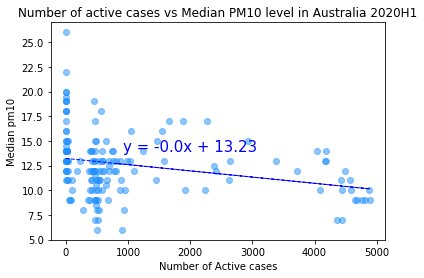

In [26]:
linear_regression_plot(au_air_covid_pm10, "Active cases", "Median pm10", "au_air_covid_pm10",
                       "Number of active cases vs Median PM10 level in Australia 2020H1")

In [27]:
au_air_covid_no2 = world_air_covid_each_specie(airdf=au_air_df, specie="no2", covid_df=active_au_covid)
au_air_covid_no2.head()

,Date,Country,Active cases,Median no2
0,2020-01-22,Australia,0,3.8
1,2020-01-23,Australia,0,4.7
2,2020-01-24,Australia,0,3.4
3,2020-01-25,Australia,0,2.1
4,2020-01-26,Australia,4,3.3


The correlation coefficient is: 0.016429701804397717
The r-squared is: 0.0002699351013814296


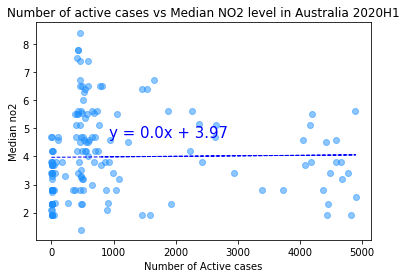

In [28]:
linear_regression_plot(au_air_covid_no2, "Active cases", "Median no2", "au_air_covid_no2",
                       "Number of active cases vs Median NO2 level in Australia 2020H1")

In [29]:
au_air_covid_o3 = world_air_covid_each_specie(airdf=au_air_df, specie="o3", covid_df=active_au_covid)
au_air_covid_o3.head()

,Date,Country,Active cases,Median o3
0,2020-01-22,Australia,0,11.40
1,2020-01-23,Australia,0,9.00
2,2020-01-24,Australia,0,7.55
3,2020-01-25,Australia,0,11.20
4,2020-01-26,Australia,4,10.40


The correlation coefficient is: 0.010602775504139674
The r-squared is: 0.00011241884839118432


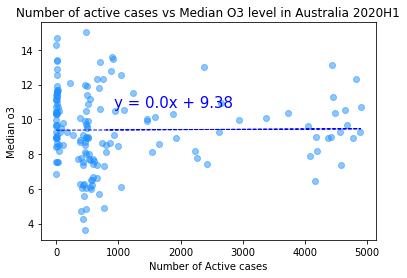

In [30]:
linear_regression_plot(au_air_covid_o3, "Active cases", "Median o3", "au_air_covid_o3",
                       "Number of active cases vs Median O3 level in Australia 2020H1")

In [31]:
au_air_covid_so2 = world_air_covid_each_specie(airdf=au_air_df, specie="so2", covid_df=active_au_covid)
au_air_covid_so2.head()

,Date,Country,Active cases,Median so2
0,2020-01-22,Australia,0,1.5
1,2020-01-23,Australia,0,1.5
2,2020-01-24,Australia,0,1.6
3,2020-01-25,Australia,0,1.1
4,2020-01-26,Australia,4,1.4


The correlation coefficient is: -0.384509094238364
The r-squared is: 0.14784724355200707


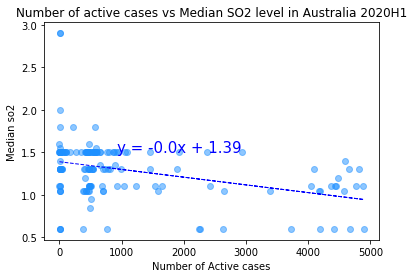

In [32]:
linear_regression_plot(au_air_covid_so2, "Active cases", "Median so2", "au_air_covid_so2",
                       "Number of active cases vs Median SO2 level in Australia 2020H1")

## How has change in Covid-19 active cases correlated with change in India's air quality in 2020H1?

In [33]:
in_air_df = world_air[world_air["Country_code"]=="IN"].copy()
in_air_df.head()

,Date,Country_code,City,Specie,count,min,max,median,variance,Country_name
1220811,2020-02-24,IN,Thrissur,co,24,2.1,11.2,5.3,58.36,India
1220812,2020-04-07,IN,Thrissur,co,72,2.3,13.6,8.1,131.11,India
1220813,2020-04-24,IN,Thrissur,co,67,1.4,12.2,9.2,126.02,India
1220814,2020-06-05,IN,Thrissur,co,72,0.7,26.8,14.1,532.05,India
1220815,2020-06-13,IN,Thrissur,co,72,0.3,30.3,15.0,671.30,India


In [34]:
in_air_covid_pm25 = world_air_covid_each_specie(airdf=in_air_df, specie="pm25", covid_df=active_india_covid)
in_air_covid_pm25.head()

,Date,Country,Active cases,Median pm25
0,2020-01-22,India,0,153.0
1,2020-01-23,India,0,153.0
2,2020-01-24,India,0,154.0
3,2020-01-25,India,0,158.0
4,2020-01-26,India,0,159.0


The correlation coefficient is: -0.5590992737953021
The r-squared is: 0.3125919979584342


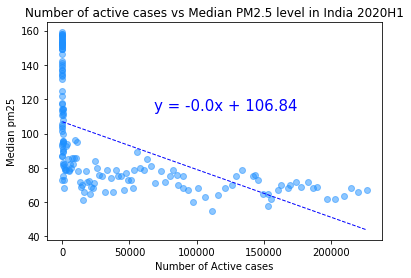

In [35]:
linear_regression_plot(in_air_covid_pm25, "Active cases", "Median pm25", "in_air_covid_pm25",
                       "Number of active cases vs Median PM2.5 level in India 2020H1")

In [36]:
in_air_covid_no2 = world_air_covid_each_specie(airdf=in_air_df, specie="no2", covid_df=active_india_covid)
in_air_covid_no2.head()

,Date,Country,Active cases,Median no2
0,2020-01-22,India,0,12.85
1,2020-01-23,India,0,12.60
2,2020-01-24,India,0,15.50
3,2020-01-25,India,0,17.45
4,2020-01-26,India,0,17.75


The correlation coefficient is: -0.5011354595928155
The r-squared is: 0.2511367488613024


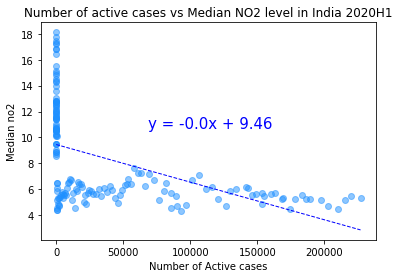

In [37]:
linear_regression_plot(in_air_covid_no2, "Active cases", "Median no2", "in_air_covid_no2",
                       "Number of active cases vs Median NO2 level in India 2020H1")

In [38]:
in_air_covid_pm10 = world_air_covid_each_specie(airdf=in_air_df, specie="pm10", covid_df=active_india_covid)
in_air_covid_pm10.head()

,Date,Country,Active cases,Median pm10
0,2020-01-22,India,0,77.0
1,2020-01-23,India,0,73.5
2,2020-01-24,India,0,79.5
3,2020-01-25,India,0,88.5
4,2020-01-26,India,0,88.5


The correlation coefficient is: -0.6328098339844632
The r-squared is: 0.4004482859874439


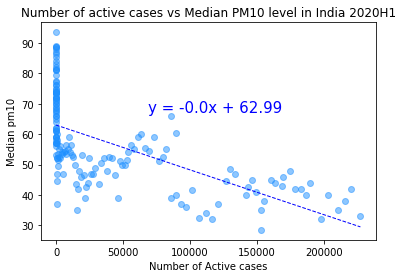

In [39]:
linear_regression_plot(in_air_covid_pm10, "Active cases", "Median pm10", "in_air_covid_pm10",
                       "Number of active cases vs Median PM10 level in India 2020H1")

In [40]:
in_air_covid_o3 = world_air_covid_each_specie(airdf=in_air_df, specie="o3", covid_df=active_india_covid)
in_air_covid_o3.head()

,Date,Country,Active cases,Median o3
0,2020-01-22,India,0,9.20
1,2020-01-23,India,0,10.35
2,2020-01-24,India,0,9.90
3,2020-01-25,India,0,7.90
4,2020-01-26,India,0,7.30


The correlation coefficient is: -0.32558148446257373
The r-squared is: 0.10600330302485314


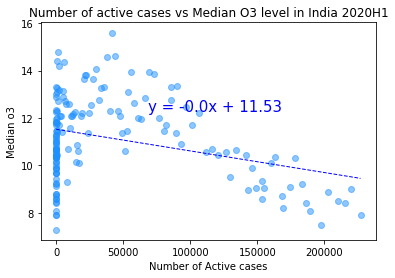

In [41]:
linear_regression_plot(in_air_covid_o3, "Active cases", "Median o3", "in_air_covid_o3",
                       "Number of active cases vs Median O3 level in India 2020H1")

In [42]:
in_air_covid_so2 = world_air_covid_each_specie(airdf=in_air_df, specie="so2", covid_df=active_india_covid)
in_air_covid_so2.head()

,Date,Country,Active cases,Median so2
0,2020-01-22,India,0,4.55
1,2020-01-23,India,0,4.45
2,2020-01-24,India,0,4.40
3,2020-01-25,India,0,4.95
4,2020-01-26,India,0,4.75


The correlation coefficient is: -0.6216286293193106
The r-squared is: 0.3864221527894049


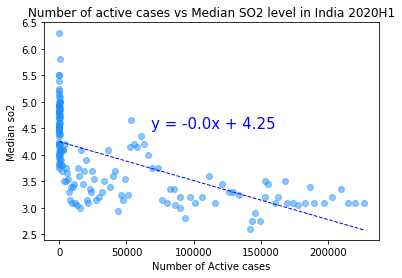

In [43]:
linear_regression_plot(in_air_covid_so2, "Active cases", "Median so2", "in_air_covid_so2",
                       "Number of active cases vs Median SO2 level in India 2020H1")

In [44]:
in_air_covid_co = world_air_covid_each_specie(airdf=in_air_df, specie="co", covid_df=active_india_covid)
in_air_covid_co.head()

,Date,Country,Active cases,Median co
0,2020-01-22,India,0,8.55
1,2020-01-23,India,0,7.50
2,2020-01-24,India,0,6.85
3,2020-01-25,India,0,8.95
4,2020-01-26,India,0,9.10


The correlation coefficient is: -0.46327863178099465
The r-squared is: 0.21462709066487043


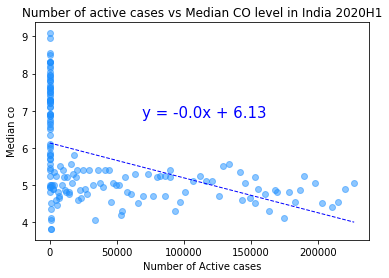

In [45]:
linear_regression_plot(in_air_covid_co, "Active cases", "Median co", "in_air_covid_co",
                       "Number of active cases vs Median CO level in India 2020H1")

## How has change in Covid-19 active cases correlated with change in the world's air quality in 2020H1?

The world here means covering 88 countries as explained in the data exploration notebook

In [46]:
world_air_covid_median_pm25 = world_air_covid_each_specie(world_air, "pm25", active_world_covid)
world_air_covid_median_pm25.head()

,Date,Total active cases,Median pm25
0,2020-01-22,510,62.75
1,2020-01-23,606,68.00
2,2020-01-24,879,66.25
3,2020-01-25,1350,66.00
4,2020-01-26,2005,65.25


The correlation coefficient is: -0.7663059546216506
The r-squared is: 0.5872248160885992


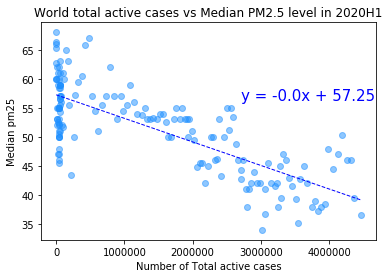

In [47]:
linear_regression_plot(world_air_covid_median_pm25, "Total active cases", "Median pm25", "world_air_covid_median_pm25",
                       "World total active cases vs Median PM2.5 level in 2020H1")

In [48]:
world_air_covid_median_pm10 = world_air_covid_each_specie(world_air, "pm10", active_world_covid)
world_air_covid_median_pm10.head()

,Date,Total active cases,Median pm10
0,2020-01-22,510,28.0
1,2020-01-23,606,26.0
2,2020-01-24,879,29.0
3,2020-01-25,1350,28.0
4,2020-01-26,2005,24.0


The correlation coefficient is: -0.5074585633945947
The r-squared is: 0.25751419356250593


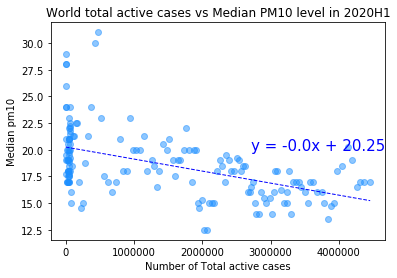

In [49]:
linear_regression_plot(world_air_covid_median_pm10, "Total active cases", "Median pm10", "world_air_covid_median_pm10",
                       "World total active cases vs Median PM10 level in 2020H1")

In [50]:
world_air_covid_median_co = world_air_covid_each_specie(world_air, "co", active_world_covid)
world_air_covid_median_co.head()

,Date,Total active cases,Median co
0,2020-01-22,510,3.85
1,2020-01-23,606,4.10
2,2020-01-24,879,4.50
3,2020-01-25,1350,3.70
4,2020-01-26,2005,3.20


The correlation coefficient is: -0.5036229211032536
The r-squared is: 0.253636046660574


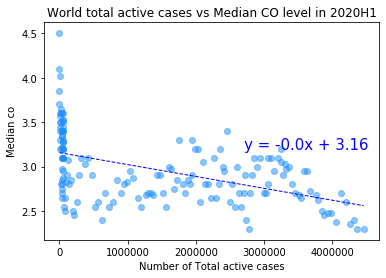

In [51]:
linear_regression_plot(world_air_covid_median_co, "Total active cases", "Median co", "world_air_covid_median_co",
                       "World total active cases vs Median CO level in 2020H1")

In [52]:
world_air_covid_median_no2 = world_air_covid_each_specie(world_air, "no2", active_world_covid)
world_air_covid_median_no2.head()

,Date,Total active cases,Median no2
0,2020-01-22,510,12.850
1,2020-01-23,606,12.700
2,2020-01-24,879,10.875
3,2020-01-25,1350,9.800
4,2020-01-26,2005,8.700


The correlation coefficient is: -0.5857525998030209
The r-squared is: 0.3431061081759979


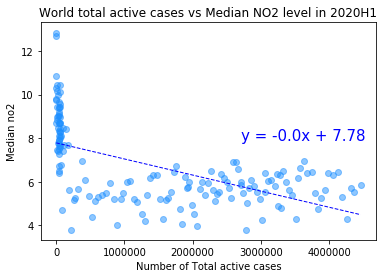

In [53]:
linear_regression_plot(world_air_covid_median_no2, "Total active cases", "Median no2", "world_air_covid_median_no2",
                       "World total active cases vs Median NO2 level in 2020H1")

In [54]:
world_air_covid_median_so2 = world_air_covid_each_specie(world_air, "so2", active_world_covid)
world_air_covid_median_so2.head()

,Date,Total active cases,Median so2
0,2020-01-22,510,2.00
1,2020-01-23,606,2.10
2,2020-01-24,879,2.15
3,2020-01-25,1350,2.15
4,2020-01-26,2005,2.00


The correlation coefficient is: -0.5787442419736522
The r-squared is: 0.3349448976176572


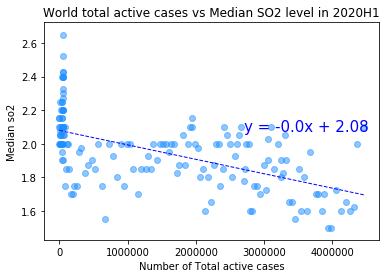

In [55]:
linear_regression_plot(world_air_covid_median_so2, "Total active cases", "Median so2", "world_air_covid_median_so2",
                       "World total active cases vs Median SO2 level in 2020H1")

In [56]:
world_air_covid_median_o3 = world_air_covid_each_specie(world_air, "o3", active_world_covid)
world_air_covid_median_o3.head()

,Date,Total active cases,Median o3
0,2020-01-22,510,11.900
1,2020-01-23,606,10.400
2,2020-01-24,879,12.250
3,2020-01-25,1350,12.725
4,2020-01-26,2005,12.900


The correlation coefficient is: 0.43347846892182434
The r-squared is: 0.18790358301880902


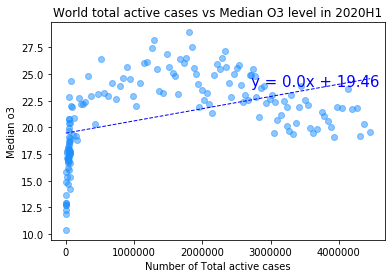

In [57]:
linear_regression_plot(world_air_covid_median_o3, "Total active cases", "Median o3", "world_air_covid_median_o3",
                       "World total active cases vs Median O3 level in 2020H1")